In [2]:
import glob
import numpy as np
import random
import cv2
from cv2 import resize
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
from sklearn.model_selection import train_test_split




SAMPLES = 12503
CHARS = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
ROWS = 64
COLS = 64

images = np.zeros(shape=(SAMPLES, ROWS, COLS,3))
labels = np.zeros(shape=(SAMPLES,), dtype=int)
sample_num = 0
for sample in sorted(glob.glob('D:/lab2/深度学习课程设计/crnn-pytorch-master/data/GoodImg/Bmp/*')):
    for image in glob.glob(sample + '/*'):
        if sample_num == SAMPLES: 
            break
        ori_image = imread(image)
        #ori_image = preprocess(ori_image)
        #print(len(ori_image.shape))
        if len(ori_image.shape) == 2:
            ori_image = cv2.merge((ori_image,ori_image,ori_image))
        images[sample_num] = resize(ori_image, dsize=(COLS, ROWS))
        labels[sample_num] = int(sample[-2:]) - 1
        sample_num += 1

        
for sample in sorted(glob.glob('D:/lab2/深度学习课程设计/crnn-pytorch-master/data/BadImg/Bmp/*')):
    for image in glob.glob(sample + '/*'):
        if sample_num == SAMPLES: 
            break
        ori_image = imread(image)
        #ori_image = preprocess(ori_image)
        #print(len(ori_image.shape))
        if len(ori_image.shape) == 2:
            ori_image = cv2.merge((ori_image,ori_image,ori_image))
        images[sample_num] = resize(ori_image, dsize=(COLS, ROWS))
        labels[sample_num] = int(sample[-2:]) - 1
        sample_num += 1


        

images, images_test, labels, labels_test = train_test_split(images, labels, test_size=0.2)
images = np.transpose(images, (0, 3, 2, 1))
images_test = np.transpose(images_test, (0, 3, 2, 1))
print(f'{images.shape[0]} sample images of size {images.shape[3]}x{images.shape[2]}')
print(f'{labels.shape[0]} labels')
assert images.shape[0] == labels.shape[0]

10002 sample images of size 64x64
10002 labels


In [6]:
labels.shape

(10002,)

In [7]:
num_classes = len(set(labels))
num_classes

62

In [8]:
images.shape

(10002, 3, 64, 64)

In [9]:

# Convert images and labels to PyTorch tensors


#print(images.info)
#images = preprocess(images)
images_tensor = torch.tensor(images, dtype=torch.float32)  # Add a channel dimension
labels_tensor = torch.tensor(labels, dtype=torch.long)

images_test_tensor = torch.tensor(images_test, dtype=torch.float32)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(images_tensor, labels_tensor)
test_dataset = TensorDataset(images_test_tensor, labels_test_tensor)


In [6]:
images_tensor.shape

torch.Size([6164, 3, 64, 64])

In [8]:
import matplotlib as plt

In [12]:

class ResNet_improv(nn.Module):
    def __init__(self, my_pretrained_model):
        super(ResNet_improv, self).__init__()
        self.pretrained = my_pretrained_model
        n_inputs = my_pretrained_model.fc.out_features
        self.my_new_layers = nn.Sequential(
                                nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4),
                                nn.Linear(256, num_classes), nn.LogSoftmax(dim=1))
    
    def forward(self, x):
        x = self.pretrained(x)
        x = self.my_new_layers(x)
        return x



In [13]:

# DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load pre-trained VGG model

#vgg_model = models.vgg16(pretrained=False)
#vgg_model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
ResNet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
# Modify the last layer to match the number of classes in your dataset
model = ResNet_improv(ResNet)
model


Using cache found in C:\Users\Administrator/.cache\torch\hub\pytorch_vision_v0.10.0


ResNet_improv(
  (pretrained): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [ ]:

# DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load pre-trained VGG model
vgg_model = models.vgg16(pretrained=False)
#vgg_model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)

# Modify the last layer to match the number of classes in your dataset

vgg_model.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(256, num_classes), nn.LogSoftmax(dim=1))


# Initialize the model, loss function, and optimizer
model = vgg_model
model

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Train the model
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Variable to store the best validation accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = correct_train / total_train
    train_loss_list.append(epoch_train_loss)
    train_accuracy_list.append(epoch_train_accuracy)

    # Validation
    model.eval()
    with torch.no_grad():
        correct_val = 0
        total_val = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

        epoch_val_accuracy = correct_val / total_val
        val_accuracy_list.append(epoch_val_accuracy)

        # Check if the current model has the highest validation accuracy
        if epoch_val_accuracy > best_val_accuracy:
            best_val_accuracy = epoch_val_accuracy
            # Save the model
            torch.save(model.state_dict(), 'D:/lab2/深度学习课程设计/crnn-pytorch-master/checkpoints/resnet_chars74k.pth')

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_train_loss}, Training Accuracy: {epoch_train_accuracy}, Validation Accuracy: {epoch_val_accuracy}')

# Plotting


Epoch 1/20, Loss: 0.8242240345355162, Training Accuracy: 0.7478909798831928, Validation Accuracy: 0.7579493835171967
Epoch 2/20, Loss: 0.6316418064009283, Training Accuracy: 0.7897469175859831, Validation Accuracy: 0.7598961713173265
Epoch 3/20, Loss: 0.5782507461370882, Training Accuracy: 0.8118105126541207, Validation Accuracy: 0.7858533419857235
Epoch 4/20, Loss: 0.5166487954940993, Training Accuracy: 0.8212199870214146, Validation Accuracy: 0.7637897469175859
Epoch 5/20, Loss: 0.49528930697244467, Training Accuracy: 0.8301427644386762, Validation Accuracy: 0.7936404931862427
Epoch 6/20, Loss: 0.3874900910196845, Training Accuracy: 0.859344581440623, Validation Accuracy: 0.8020765736534717
Epoch 7/20, Loss: 0.37348121804060397, Training Accuracy: 0.8640493186242699, Validation Accuracy: 0.8098637248539909
Epoch 8/20, Loss: 0.32524411856513663, Training Accuracy: 0.8794613887086308, Validation Accuracy: 0.8098637248539909
Epoch 9/20, Loss: 0.32537405653712675, Training Accuracy: 0.88

NameError: name 'plt' is not defined

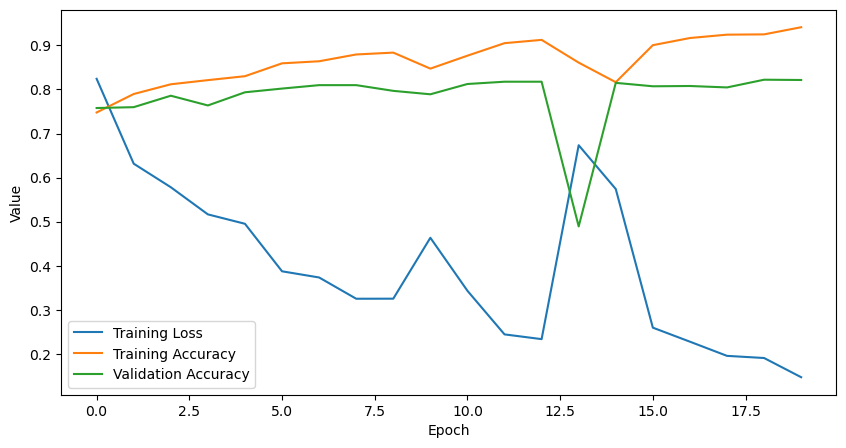

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [20]:
from transformers import MobileViTConfig, MobileViTModel

# Initializing a mobilevit-small style configuration
configuration = MobileViTConfig()

# Initializing a model from the mobilevit-small style configuration
model = MobileViTModel(configuration)

# Accessing the model configuration
configuration = model.config

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import timm

# Define the MobileViT model
class MobileViTBackbone(nn.Module):
    def __init__(self, num_classes=1000, pretrained=True):
        super(MobileViTBackbone, self).__init__()
        self.model = timm.create_model('mobilevit_small', pretrained=pretrained)
        self.model.head = nn.Linear(self.model.head.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [9]:
model = timm.create_model(
    'mobilevit_s.cvnets_in1k',
    pretrained=False,
    features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)
dummy_input = torch.randn(5, 3, 32, 100)
output = model(dummy_input) # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 32, 128, 128])
    #  torch.Size([1, 64, 64, 64])
    #  torch.Size([1, 96, 32, 32])
    #  torch.Size([1, 128, 16, 16])
    #  torch.Size([1, 640, 8, 8])

    print(o.shape)

torch.Size([5, 32, 16, 50])
torch.Size([5, 64, 8, 25])
torch.Size([5, 96, 4, 13])
torch.Size([5, 128, 2, 7])
torch.Size([5, 640, 1, 4])


In [2]:
model = timm.create_model('mobilevit_s.cvnets_in1k', pretrained=False,features_only=False)
dummy_input = torch.randn(5, 3, 32, 100)
#dummy_output =model(dummy_input)
model

ByobNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (stages): Sequential(
    (0): Sequential(
      (0): BottleneckBlock(
        (conv1_1x1): ConvNormAct(
          (conv): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNormAct2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
        )
        (conv2_kxk): ConvNormAct(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (bn): BatchNormAct2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
   

In [32]:
model.stem.conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import timm

class MobileVit_improv(nn.Module):
    def __init__(self,  img_height, img_width):
        super(MobileVit_improv, self).__init__()
        self.model = timm.create_model('mobilevit_s.cvnets_in1k', pretrained=False)
        map_to_seq = self.model.head.fc.out_features
        #self.model.head.fc = nn.Linear(self.model.head.in_features, map_to_seq)
        
        
        self.my_new_layers = nn.Sequential(
                                nn.Linear(map_to_seq, 256), nn.ReLU(), nn.Dropout(0.4),
                                nn.Linear(256, num_classes), nn.LogSoftmax(dim=1))
    
    def forward(self, x):
        x = self.model(x)
        x = self.my_new_layers(x)
        return x

   


In [11]:
# DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load pre-trained VGG model
#model = MobileViTModel(configuration)

# Modify the last layer to match the number of classes in your dataset
model = MobileVit_improv(64,64)
model

MobileVit_improv(
  (model): ByobNet(
    (stem): ConvNormAct(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): SiLU(inplace=True)
      )
    )
    (stages): Sequential(
      (0): Sequential(
        (0): BottleneckBlock(
          (conv1_1x1): ConvNormAct(
            (conv): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNormAct2d(
              64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): SiLU(inplace=True)
            )
          )
          (conv2_kxk): ConvNormAct(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (bn): BatchNormAct2d(
              64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Train the model
num_epochs = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Variable to store the best validation accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = correct_train / total_train
    train_loss_list.append(epoch_train_loss)
    train_accuracy_list.append(epoch_train_accuracy)

    # Validation
    model.eval()
    with torch.no_grad():
        correct_val = 0
        total_val = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

        epoch_val_accuracy = correct_val / total_val
        val_accuracy_list.append(epoch_val_accuracy)

        # Check if the current model has the highest validation accuracy
        if epoch_val_accuracy > best_val_accuracy:
            best_val_accuracy = epoch_val_accuracy
            # Save the model
            torch.save(model.state_dict(), 'D:/lab2/深度学习课程设计/crnn-pytorch-master/checkpoints/mobileVit_chars74k_2.pth')

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_train_loss}, Training Accuracy: {epoch_train_accuracy}, Validation Accuracy: {epoch_val_accuracy}')



Epoch 1/300, Loss: 1.6075733649502895, Training Accuracy: 0.5828834233153369, Validation Accuracy: 0.625749700119952
Epoch 2/300, Loss: 1.2676311347894609, Training Accuracy: 0.6474705058988203, Validation Accuracy: 0.6913234706117553
Epoch 3/300, Loss: 1.0508309974791898, Training Accuracy: 0.6969606078784243, Validation Accuracy: 0.7333066773290684
Epoch 4/300, Loss: 0.8997238752948251, Training Accuracy: 0.738252349530094, Validation Accuracy: 0.79328268692523
Epoch 5/300, Loss: 1.274694006534139, Training Accuracy: 0.6802639472105579, Validation Accuracy: 0.5961615353858457
Epoch 6/300, Loss: 1.7172203686586611, Training Accuracy: 0.5674865026994601, Validation Accuracy: 0.6333466613354658
Epoch 7/300, Loss: 1.455611435471067, Training Accuracy: 0.6329734053189362, Validation Accuracy: 0.6093562574970012
Epoch 8/300, Loss: 1.1951796104953547, Training Accuracy: 0.6780643871225754, Validation Accuracy: 0.6241503398640543
Epoch 9/300, Loss: 1.3719507634260093, Training Accuracy: 0.64

Epoch 71/300, Loss: 0.22460429465315143, Training Accuracy: 0.9211157768446311, Validation Accuracy: 0.8792483006797281
Epoch 72/300, Loss: 0.22627528166030622, Training Accuracy: 0.913617276544691, Validation Accuracy: 0.866453418632547
Epoch 73/300, Loss: 0.21110058041989424, Training Accuracy: 0.9205158968206358, Validation Accuracy: 0.8660535785685726
Epoch 74/300, Loss: 0.20086598450875587, Training Accuracy: 0.9244151169766047, Validation Accuracy: 0.8648540583766493
Epoch 75/300, Loss: 0.17542775471214275, Training Accuracy: 0.9334133173365327, Validation Accuracy: 0.8760495801679328
Epoch 76/300, Loss: 0.1655736475898202, Training Accuracy: 0.9385122975404919, Validation Accuracy: 0.8812475009996001
Epoch 77/300, Loss: 0.1960720945220844, Training Accuracy: 0.9257148570285942, Validation Accuracy: 0.8780487804878049
Epoch 78/300, Loss: 0.18960408842677523, Training Accuracy: 0.9311137772445511, Validation Accuracy: 0.8748500599760096
Epoch 79/300, Loss: 0.16781525328090996, Tra

Epoch 140/300, Loss: 0.08790371262699745, Training Accuracy: 0.9697060587882423, Validation Accuracy: 0.8812475009996001
Epoch 141/300, Loss: 0.08217776891223755, Training Accuracy: 0.9732053589282144, Validation Accuracy: 0.8860455817672931
Epoch 142/300, Loss: 0.06850893150831151, Training Accuracy: 0.9753049390121976, Validation Accuracy: 0.882047181127549
Epoch 143/300, Loss: 0.08830016783578025, Training Accuracy: 0.9702059588082383, Validation Accuracy: 0.8816473410635746
Epoch 144/300, Loss: 0.09691985360803498, Training Accuracy: 0.9656068786242752, Validation Accuracy: 0.8776489404238305
Epoch 145/300, Loss: 0.06805517424230173, Training Accuracy: 0.9777044591081784, Validation Accuracy: 0.8856457417033187
Epoch 146/300, Loss: 0.06141722171825422, Training Accuracy: 0.978004399120176, Validation Accuracy: 0.8792483006797281
Epoch 147/300, Loss: 0.11184320300350345, Training Accuracy: 0.9692061587682463, Validation Accuracy: 0.8708516593362655
Epoch 148/300, Loss: 0.07966879755

Epoch 208/300, Loss: 0.05761437067657003, Training Accuracy: 0.9840031993601279, Validation Accuracy: 0.8888444622151139
Epoch 209/300, Loss: 0.08208950828192874, Training Accuracy: 0.9772045590881824, Validation Accuracy: 0.8868452618952419
Epoch 210/300, Loss: 0.0635937687558653, Training Accuracy: 0.9816036792641472, Validation Accuracy: 0.8676529388244703
Epoch 211/300, Loss: 0.09991093604769083, Training Accuracy: 0.9683063387322536, Validation Accuracy: 0.8852459016393442
Epoch 212/300, Loss: 0.0393635208157164, Training Accuracy: 0.9871025794841032, Validation Accuracy: 0.8832467013194722
Epoch 213/300, Loss: 0.03336289496604831, Training Accuracy: 0.990501899620076, Validation Accuracy: 0.890843662534986
Epoch 214/300, Loss: 0.015241029838573917, Training Accuracy: 0.9944011197760448, Validation Accuracy: 0.8872451019592164
Epoch 215/300, Loss: 0.01970088333295697, Training Accuracy: 0.9944011197760448, Validation Accuracy: 0.8948420631747301
Epoch 216/300, Loss: 0.026952977121

Epoch 276/300, Loss: 0.025946281345423598, Training Accuracy: 0.9937012597480503, Validation Accuracy: 0.8904438224710116
Epoch 277/300, Loss: 0.027568501658034636, Training Accuracy: 0.9909018196360728, Validation Accuracy: 0.8964414234306277
Epoch 278/300, Loss: 0.026359307095202702, Training Accuracy: 0.9934013197360528, Validation Accuracy: 0.8968412634946021
Epoch 279/300, Loss: 0.03530125475286539, Training Accuracy: 0.99250149970006, Validation Accuracy: 0.8848460615753698
Epoch 280/300, Loss: 0.018957052433431452, Training Accuracy: 0.9942011597680463, Validation Accuracy: 0.8944422231107557
Epoch 281/300, Loss: 0.021086173574412375, Training Accuracy: 0.99500099980004, Validation Accuracy: 0.8968412634946021
Epoch 282/300, Loss: 0.011516037511206481, Training Accuracy: 0.9969006198760247, Validation Accuracy: 0.890843662534986
Epoch 283/300, Loss: 0.05764048675638269, Training Accuracy: 0.9858028394321136, Validation Accuracy: 0.8828468612554978
Epoch 284/300, Loss: 0.04106787

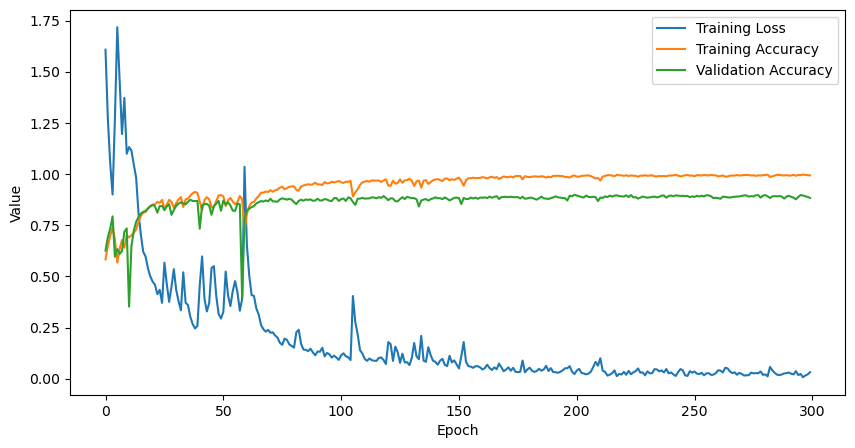

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
import os
import pickle

In [16]:
histories = [train_loss_list,train_accuracy_list,val_accuracy_list]
with open('D:/lab2/深度学习课程设计/crnn-pytorch-master/train_history/mobileVit_pretrain_2', 'wb') as fp:
    pickle.dump(histories, fp)

In [17]:

with open ('D:/lab2/深度学习课程设计/crnn-pytorch-master/train_history/mobileVit_pretrain_2', 'rb') as fp:
    temp = pickle.load(fp)
temp

[[1.6075733649502895,
  1.2676311347894609,
  1.0508309974791898,
  0.8997238752948251,
  1.274694006534139,
  1.7172203686586611,
  1.455611435471067,
  1.1951796104953547,
  1.3719507634260093,
  1.0989989938250013,
  1.1317884246255183,
  1.1144400523726348,
  1.0461064802992874,
  0.9823676102859958,
  0.8091532381097223,
  0.7041774206100755,
  0.6203273703717882,
  0.5971209699181235,
  0.5396833914290567,
  0.5005359222554857,
  0.47419477002635885,
  0.45930134225043523,
  0.41319668150631483,
  0.434397265884527,
  0.37075135837884465,
  0.5670145175829056,
  0.4629725972368459,
  0.3756871473542444,
  0.4489210148336022,
  0.5349730460127448,
  0.4342918680731658,
  0.378898431635966,
  0.33411197127050657,
  0.519812305451958,
  0.37160857961435984,
  0.3597068726352066,
  0.3018703447880259,
  0.2667119404787471,
  0.24551791617065477,
  0.25781465905487155,
  0.4569341965067159,
  0.5974605806693909,
  0.39099046440830654,
  0.3284782463577902,
  0.3693277406844364,
  0.54

In [24]:
model.conv_1x1_exp

MobileViTConvLayer(
  (convolution): Conv2d(160, 640, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (normalization): BatchNorm2d(640, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): SiLUActivation()
)

In [16]:
configuration

MobileViTConfig {
  "aspp_dropout_prob": 0.1,
  "aspp_out_channels": 256,
  "atrous_rates": [
    6,
    12,
    18
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "conv_kernel_size": 3,
  "expand_ratio": 4.0,
  "hidden_act": "silu",
  "hidden_dropout_prob": 0.1,
  "hidden_sizes": [
    144,
    192,
    240
  ],
  "image_size": 256,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 2.0,
  "model_type": "mobilevit",
  "neck_hidden_sizes": [
    16,
    32,
    64,
    96,
    128,
    160,
    640
  ],
  "num_attention_heads": 4,
  "num_channels": 3,
  "output_stride": 32,
  "patch_size": 2,
  "qkv_bias": true,
  "semantic_loss_ignore_index": 255,
  "transformers_version": "4.32.1"
}

In [40]:
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class ResidualBlock(torch.nn.Module):

    def __init__(self, channels):
        
        super(ResidualBlock, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=channels[0],
                                      out_channels=channels[1],
                                      kernel_size=(3, 3),
                                      stride=(2, 2),
                                      padding=1)
        self.conv_1_bn = torch.nn.BatchNorm2d(channels[1])
                                    
        self.conv_2 = torch.nn.Conv2d(in_channels=channels[1],
                                      out_channels=channels[2],
                                      kernel_size=(3, 3),
                                      stride=(1, 1),
                                      padding=0)   
        self.conv_2_bn = torch.nn.BatchNorm2d(channels[2])

        self.conv_shortcut_1 = torch.nn.Conv2d(in_channels=channels[0],
                                               out_channels=channels[2],
                                               kernel_size=(5, 5),
                                               stride=(2, 2),
                                               padding=0)   
        self.conv_shortcut_1_bn = torch.nn.BatchNorm2d(channels[2])

    def forward(self, x):
        shortcut = x
        
        out = self.conv_1(x)
        out = self.conv_1_bn(out)
        out = F.relu(out)

        out = self.conv_2(out)
        out = self.conv_2_bn(out)
        #print('layer1')
        #print(out.shape)
        # match up dimensions using a linear function (no relu)
        shortcut = self.conv_shortcut_1(shortcut)
        shortcut = self.conv_shortcut_1_bn(shortcut)
        #print('shortcut')
        #print(shortcut.shape)
        out += shortcut
        out = F.relu(out)

        return out
    
    
class LeNet(nn.Module):

    # network structure
    def __init__(self,NUM_CLASSES,grayscale=True):
        
        if grayscale:
            in_dim = 1
        else:
            in_dim = 3
        print(in_dim)
        super(LeNet, self).__init__()
        self.residual_block_1 = ResidualBlock(channels=[in_dim, 6, 16])
        self.residual_block_2 = ResidualBlock(channels=[16, 6, 16])
        self.fc1   = nn.Linear(16*30*30, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, NUM_CLASSES)

    def forward(self, x):
        '''
        One forward pass through the network.
        
        Args:
            x: input
        '''
        x = self.residual_block_1.forward(x)
        #print('layer1')
        #print(x.shape)
        #x = self.residual_block_1.forward(x)
        
        x = x.view(-1, self.num_flat_features(x))
        #print('layer2')
        #print(x.shape)
        
        x = self.fc1(x)
        
        #print('layer3')
        #print(x.shape)
        
        
        x = F.relu(x)
        #print('layer4')
        #print(x.shape)
        
        
        x = self.fc2(x)
        x = F.relu(x)
        #print('layer5')
        #print(x.shape)
        x = self.fc3(x)
        #print('layer6')
        #print(x.shape)
        return x

    def num_flat_features(self, x):
        '''
        Get the number of features in a batch of tensors `x`.
        '''
        size = x.size()[1:]
        return np.prod(size)

In [50]:
model = LeNet(num_classes,grayscale=False)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Train the model
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Variable to store the best validation accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = correct_train / total_train
    train_loss_list.append(epoch_train_loss)
    train_accuracy_list.append(epoch_train_accuracy)

    # Validation
    model.eval()
    with torch.no_grad():
        correct_val = 0
        total_val = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

        epoch_val_accuracy = correct_val / total_val
        val_accuracy_list.append(epoch_val_accuracy)

        # Check if the current model has the highest validation accuracy
        if epoch_val_accuracy > best_val_accuracy:
            best_val_accuracy = epoch_val_accuracy
            # Save the model
            torch.save(model.state_dict(), 'D:/lab2/深度学习课程设计/crnn-pytorch-master/checkpoints/vgg_chars74k.pth')

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_train_loss}, Training Accuracy: {epoch_train_accuracy}, Validation Accuracy: {epoch_val_accuracy}')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


3
Epoch 1/20, Loss: 3.7483482950741482, Training Accuracy: 0.10285528877352369, Validation Accuracy: 0.21609344581440623
Epoch 2/20, Loss: 2.538955178457437, Training Accuracy: 0.38838416612589227, Validation Accuracy: 0.38092147955872807
Epoch 3/20, Loss: 1.537761059004007, Training Accuracy: 0.5867942894224529, Validation Accuracy: 0.5846852693056457
Epoch 4/20, Loss: 1.0551256475989352, Training Accuracy: 0.7024659312134978, Validation Accuracy: 0.618429591174562
Epoch 5/20, Loss: 0.787642800930849, Training Accuracy: 0.7658987670343933, Validation Accuracy: 0.6340038935756003
Epoch 6/20, Loss: 0.571381626977134, Training Accuracy: 0.8290071382219338, Validation Accuracy: 0.6625567813108372
Epoch 7/20, Loss: 0.4471688057036744, Training Accuracy: 0.8599935107073329, Validation Accuracy: 0.6489292667099286
Epoch 8/20, Loss: 0.32337370153862177, Training Accuracy: 0.9026606099935107, Validation Accuracy: 0.6606099935107074
Epoch 9/20, Loss: 0.2434794024861965, Training Accuracy: 0.924

NameError: name 'plt' is not defined

In [173]:
from transformers import MobileViTConfig, MobileViTModel

# Initializing a mobilevit-small style configuration
configuration = MobileViTConfig()
configuration.num_channels= 1
configuration.output_stride = 8
configuration.image_size = [32, 100]
#configuration
# Initializing a model from the mobilevit-small style configuration
model = MobileViTModel(configuration)

# Accessing the model configuration
configuration = model.config

dummy_input = torch.randn(1, 1, 32, 100)
dummy_output =model(dummy_input)
dummy_output[0].size()

torch.Size([1, 640, 4, 13])

In [174]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import timm
from transformers import MobileViTConfig, MobileViTModel


class MobileVit_improv(nn.Module):
    def __init__(self,img_channel,  img_height, img_width,num_class,rnn_hidden=256):
        super(MobileVit_improv, self).__init__()
        configuration = MobileViTConfig()
        configuration.num_channels= 1
        configuration.output_stride = 8
        configuration.image_size = [img_height, img_width]
        configuration.return_dict=False
        #configuration.output_hidden_states=True
        self.model  = MobileViTModel(configuration)
        #self.model.stem.conv = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        
        map_to_seq_hidden = 1000
        #self.model.head.fc = nn.Linear(self.model.head.in_features, map_to_seq)
        output_channel, output_height, output_width = self._compute_output_shape(img_channel, img_height, img_width)
        
        self.map_to_seq = nn.Linear(output_channel * output_height, map_to_seq_hidden)
        self.rnn1 = nn.LSTM(map_to_seq_hidden, rnn_hidden, bidirectional=True)
        self.rnn2 = nn.LSTM(2 * rnn_hidden, rnn_hidden, bidirectional=True)

        self.dense = nn.Linear(2 * rnn_hidden, num_class)
        
    
    
    def forward(self, x):
        x = self.model(x)[0]
        #print(x)
        batch, channel, height, width = x.size()
        #print('batch, channel, height, width')
        #print(batch, channel, height, width)
        x = x.view(batch, channel * height, width)
        x = x.permute(2, 0, 1)  # (width, batch, feature)
        #print(x.size())
        seq = self.map_to_seq(x)

        recurrent, _ = self.rnn1(seq)
        recurrent, _ = self.rnn2(recurrent)

        output = self.dense(recurrent)
        return output  # shape: (seq_len, batch, num_class)
        

    def _compute_output_shape(self,img_channel,  img_height, img_width):
        dummy_input = torch.randn(1, img_channel, img_height, img_width)
        dummy_output = self.model(dummy_input)
        #print(len(dummy_output))
        #print(dummy_output[0].shape)
        #print(dummy_output[1].shape)
        
        
        _, channels, height, width = dummy_output[0].size()
        #print('hihi')
        #print(channels, height, width)
        return channels, height, width


In [175]:
num_class = 37
model = MobileVit_improv(1,32,100,num_class)

dummy_input = torch.randn(1, 1, 32, 100)
dummy_output =model(dummy_input)
dummy_output.size()

torch.Size([13, 1, 37])

In [5]:
import mobilevit as mobilevit
#from mobilevit import MobileViTBlock

In [6]:
dims = [64, 80, 96]
channels = [16, 16, 24, 24, 48, 48, 64, 64, 80, 80, 320]
mobilevit.MobileViT((256, 256), dims, channels, num_classes=1000, expansion=2)

MobileViT(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
  )
  (mv2): ModuleList(
    (0): MV2Block(
      (conv): Sequential(
        (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): SiLU()
        (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): MV2Block(
      (conv): Sequential(
        (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [8]:
hi = mobilevit.MobileViTBlock
hi

mobilevit.MobileViTBlock

In [189]:
class MobileViT_RNN(nn.Module):
    def __init__(self, image_size, dims, channels, num_classes, expansion=4, kernel_size=3, patch_size=(2, 2)):
        super().__init__()
        ih, iw = image_size
        ph, pw = patch_size
        assert ih % ph == 0 and iw % pw == 0

        L = [2, 4, 3]
        rnn_hidden = 256
        self.conv1 = conv_nxn_bn(1, channels[0], stride=2)
                
        ' 0    1   2     3   4     5    6    7'      
        '[16, 32, 64, 64, 128, 128, 256,256]'
            
        self.mv2 = nn.ModuleList([])
        self.mv2.append(MV2Block(channels[0], channels[1], 1, expansion)) #0
        self.mv2.append(MV2Block(channels[1], channels[2], 2, expansion)) #1
        #vit
        self.mv2.append(MV2Block(channels[3], channels[4], 2, expansion)) #2
        #vit
        self.mv2.append(MV2Block(channels[5], channels[6], 1, expansion)) #3
        #vit
        
        self.mvit = nn.ModuleList([])
        self.mvit.append(MobileViTBlock(dims[0], L[0], channels[2], kernel_size, patch_size, int(dims[0]*2)))
        self.mvit.append(MobileViTBlock(dims[1], L[1], channels[4], kernel_size, patch_size, int(dims[1]*4)))
        self.mvit.append(MobileViTBlock(dims[2], L[2], channels[6], kernel_size, patch_size, int(dims[2]*4)))

        self.conv2 = conv_1x1_bn(channels[-2], channels[-1])

        self.pool = nn.AvgPool2d(ih//32, 1)
        self.fc = nn.Linear(channels[-1], num_classes, bias=False)
        
        map_to_seq_hidden = 1000
        #self.model.head.fc = nn.Linear(self.model.head.in_features, map_to_seq)
        output_channel, output_height, output_width = self._compute_output_shape(1, image_size[1], image_size[0])
        
        self.map_to_seq = nn.Linear(output_channel * output_height, map_to_seq_hidden)
        self.rnn1 = nn.LSTM(map_to_seq_hidden, rnn_hidden, bidirectional=True)
        self.rnn2 = nn.LSTM(2 * rnn_hidden, rnn_hidden, bidirectional=True)

        self.dense = nn.Linear(2 * rnn_hidden, num_class)
        
    def backbone_forward(self,x):
        x = self.conv1(x)
        x = self.mv2[0](x)
        x = self.mv2[1](x)
        x = self.mvit[0](x)
        x = self.mv2[2](x)
        x = self.mvit[1](x)
        x = self.mv2[3](x)
        x = self.mvit[2](x)
        
        
        x = self.conv2(x)
        return x

    def forward(self, x):
        
        #x = self.pool(x).view(-1, x.shape[1])
        x = self.backbone_forward(x)
        batch, channel, height, width = x.size()
        print('batch, channel, height, width')
        print(batch, channel, height, width)
        x = x.view(batch, channel * height, width)
        x = x.permute(2, 0, 1)  # (width, batch, feature)
        #print(x.size())
        seq = self.map_to_seq(x)

        recurrent, _ = self.rnn1(seq)
        recurrent, _ = self.rnn2(recurrent)

        output = self.dense(recurrent)
        #x = self.fc(x)
        return output
    
    
    def _compute_output_shape(self,img_channels,  img_width, img_height):
        print(img_channels,  img_height, img_width)
        dummy_input = torch.randn(1, img_channels, img_width, img_height)
        dummy_output = self.backbone_forward(dummy_input)
        print(dummy_output.size())
        
        _, channels, width, height = dummy_output.size()
        
        return channels, height, width

In [190]:
num_class = 37
dims = [64, 80, 96]
channels = [16, 32, 64, 64, 128, 128, 256,256]

            
model = MobileViT_RNN((32, 128), dims, channels, num_classes = num_class, expansion=2)

dummy_input = torch.randn(5, 1, 32, 128)
dummy_output =model(dummy_input)
dummy_output.size()

1 32 128
torch.Size([1, 256, 16, 4])
batch, channel, height, width
5 256 4 16


torch.Size([16, 5, 37])

In [59]:
num_class = 37
dims = [64, 80, 96]
channels = [16, 16, 24, 24, 48, 48, 64, 64, 80, 80, 320]
model = MobileViT_RNN((32, 128), dims, channels, num_classes = num_class, expansion=2)

dummy_input = torch.randn(5, 1, 32, 128)
dummy_output =model(dummy_input)
dummy_output.size()

1 32 128
torch.Size([1, 320, 16, 4])
batch, channel, height, width
5 320 4 16


torch.Size([16, 5, 37])

In [60]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

6512349

In [29]:
from einops import rearrange

def conv_1x1_bn(inp, oup):
    return nn.Sequential(
        nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
        nn.BatchNorm2d(oup),
        nn.SiLU()
    )


def conv_nxn_bn(inp, oup, kernal_size=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(inp, oup, kernal_size, stride, 1, bias=False),
        nn.BatchNorm2d(oup),
        nn.SiLU()
    )


class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)


class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout=0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.SiLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    
    def forward(self, x):
        return self.net(x)


class Attention(nn.Module):
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.):
        super().__init__()
        inner_dim = dim_head *  heads
        project_out = not (heads == 1 and dim_head == dim)

        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax(dim = -1)
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        ) if project_out else nn.Identity()

    def forward(self, x):
        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b p n (h d) -> b p h n d', h = self.heads), qkv)

        dots = torch.matmul(q, k.transpose(-1, -2)) * self.scale
        attn = self.attend(dots)
        out = torch.matmul(attn, v)
        out = rearrange(out, 'b p h n d -> b p n (h d)')
        return self.to_out(out)


class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout=0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                PreNorm(dim, Attention(dim, heads, dim_head, dropout)),
                PreNorm(dim, FeedForward(dim, mlp_dim, dropout))
            ]))
    
    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x


class MV2Block(nn.Module):
    def __init__(self, inp, oup, stride=1, expansion=4):
        super().__init__()
        self.stride = stride
        assert stride in [1, 2]

        hidden_dim = int(inp * expansion)
        self.use_res_connect = self.stride == 1 and inp == oup

        if expansion == 1:
            self.conv = nn.Sequential(
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.SiLU(),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            self.conv = nn.Sequential(
                # pw
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.SiLU(),
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.SiLU(),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )

    def forward(self, x):
        if self.use_res_connect:
            return x + self.conv(x)
        else:
            return self.conv(x)


class MobileViTBlock(nn.Module):
    def __init__(self, dim, depth, channel, kernel_size, patch_size, mlp_dim, dropout=0.):
        super().__init__()
        self.ph, self.pw = patch_size

        self.conv1 = conv_nxn_bn(channel, channel, kernel_size)
        self.conv2 = conv_1x1_bn(channel, dim)

        self.transformer = Transformer(dim, depth, 4, 8, mlp_dim, dropout)

        self.conv3 = conv_1x1_bn(dim, channel)
        self.conv4 = conv_nxn_bn(2 * channel, channel, kernel_size)
    
    def forward(self, x):
        y = x.clone()

        # Local representations
        x = self.conv1(x)
        x = self.conv2(x)
        
        # Global representations
        _, _, h, w = x.shape
        x = rearrange(x, 'b d (h ph) (w pw) -> b (ph pw) (h w) d', ph=self.ph, pw=self.pw)
        x = self.transformer(x)
        x = rearrange(x, 'b (ph pw) (h w) d -> b d (h ph) (w pw)', h=h//self.ph, w=w//self.pw, ph=self.ph, pw=self.pw)

        # Fusion
        x = self.conv3(x)
        x = torch.cat((x, y), 1)
        x = self.conv4(x)
        return x